In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header=None)

In [3]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

le = LabelEncoder()
y = le.fit_transform(y)

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

C:\Users\tsmar\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


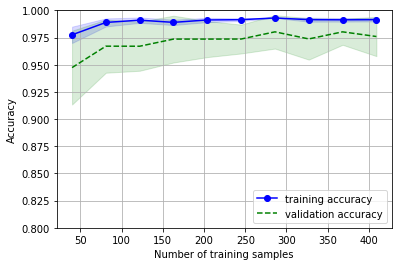

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

from sklearn.learning_curve import learning_curve 

pipe_lr = Pipeline([
    ('sscl', StandardScaler()),
    ('clf', LogisticRegression(random_state=0))
])

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe_lr,
                                                         X=X_train, y=y_train,
                                                         train_sizes=np.linspace(0.1, 1.0, 10),
                                                         cv=10,
                                                         n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, 
        color='blue', marker='o', label='training accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--',
        label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean -  test_std,
                alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.show()

In [8]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                   ('pca', PCA(n_components = 2)),
                   ('clf', LogisticRegression(random_state=1))])
pipe_lr.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [9]:
pipe_lr.score(X_test, y_test)

0.9473684210526315

In [13]:
from sklearn.cross_validation import StratifiedKFold
kfold = StratifiedKFold(y=y_train, 
                        n_folds=10,
                       random_state=1)
scores =[]
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_test[test], y_test[test])
    scores.append(score)

print(np.mean(scores), np.std(scores))

IndexError: index 114 is out of bounds for axis 0 with size 114

In [14]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator=pipe_lr, 
                          X=X_train, 
                        y = y_train, 
                        cv = 10,
                        n_jobs=1)

print('CV scores: %s' % scores)

CV scores: [0.89130435 0.97826087 0.97826087 0.91304348 0.93478261 0.97777778
 0.93333333 0.95555556 0.97777778 0.95555556]


In [16]:
print('Mean Accuracy: %f' % np.mean(scores))

Mean Accuracy: 0.949565


In [18]:
print('Standard Deviation: %f' % np.std(scores))

Standard Deviation: 0.029190


# Validation Curves in sklearn:

In [14]:
from sklearn.learning_curve import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(
                            estimator=pipe_lr, 
                            X= X_train, 
                            y = y_train, 
                            param_name='clf__C',
                            param_range=param_range,
                            cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



C:\Users\tsmar\Anaconda3\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "lower_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


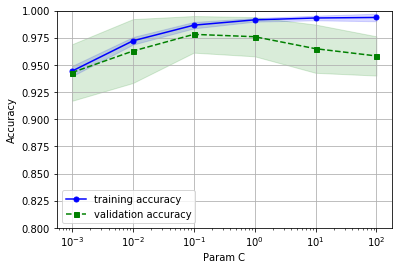

In [15]:
plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, 
                 alpha=0.15, color='blue')

plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
                 
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
                 
plt.grid()
                 
plt.xscale('log')
plt.legend(loc='lower_right')
plt.xlabel('Param C')
plt.ylabel('Accuracy')
                 
plt.ylim([0.8, 1.0])
                 
plt.show()

In [21]:
from sklearn.grid_search import GridSearchCV

from sklearn.svm import SVC

pipe_svc =  Pipeline([('scl', StandardScaler()),
                        ('clf', SVC(random_state=1))])

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
param_grid = [{'clf__C': param_range, 
               'clf__kernel': ['linear'] },
              {'clf__C': param_range,
               'clf__gamma' : param_range,
               'clf__kernel' : ['rbf']}]


gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)

0.978021978021978


**This code above is fine tuning the hyper-params of a support vector machine.**

In [23]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9649122807017544

In [24]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scl', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'clf__kernel': ['linear']}, {'clf__C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'clf__gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'clf__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [25]:
gs.best_score_

0.978021978021978

In [26]:
cross = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
cross

NameError: name 'cross_val_score' is not defined

In [27]:
from sklearn.metrics import confusion_matrix
pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confomat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confomat)

[[71  1]
 [ 2 40]]
